In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mxnet 
from mxnet.gluon import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [93]:
finalData = pd.read_csv('../data/ReadyData.csv')

In [94]:
lst = ["datetime"] + list(finalData.columns)[1:]
lst

['datetime',
 'PM2.5',
 'USAQI',
 'CO2',
 'Temperature',
 'RelativeHumidity',
 'weekday',
 'hour',
 'month',
 'year',
 'dayofmonth',
 'drct',
 'sped',
 'vsby']

In [95]:
finalData.columns = lst

In [96]:
finalData.drop("datetime", axis = 1, inplace = True)

In [132]:
mean = finalData.mean()
sd = finalData.std()
min = finalData.min()
max = finalData.max()
finalData = finalData.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
finalData = pd.DataFrame(finalData["PM2.5"])

hrs = 24

In [133]:
name = list(finalData.columns)
cols, names = list(), list()
for i in range(hrs, 0, -1): #5 times steps
    cols.append(finalData.shift(i))
    names += [('%s(t-%d)' % (name[j], i)) for j in range(finalData.shape[1])]
cols.append(finalData.shift(-0))
names += ["PM2.5"]
finalDataset = pd.concat(cols, axis=1)
finalDataset.columns = names
finalDataset = finalDataset[hrs:]

display(finalDataset.head())

,PM2.5(t-24),PM2.5(t-23),PM2.5(t-22),PM2.5(t-21),PM2.5(t-20),PM2.5(t-19),PM2.5(t-18),PM2.5(t-17),PM2.5(t-16),PM2.5(t-15),...,PM2.5(t-9),PM2.5(t-8),PM2.5(t-7),PM2.5(t-6),PM2.5(t-5),PM2.5(t-4),PM2.5(t-3),PM2.5(t-2),PM2.5(t-1),PM2.5
24,5.171740,4.783023,4.705280,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,...,1.123904,0.999515,1.144636,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307
25,4.783023,4.705280,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,...,0.999515,1.144636,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307,2.544015
26,4.705280,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,3.414741,...,1.144636,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307,2.544015,4.705280
27,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,3.414741,2.740965,...,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307,2.544015,4.705280,3.124499
28,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,3.414741,2.740965,2.481821,...,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307,2.544015,4.705280,3.124499,2.305603


In [134]:
finalDataset.reset_index(drop = True)
labels = finalDataset["PM2.5"]
finalDataset.drop("PM2.5", axis = 1, inplace = True)


In [135]:
#we have data for a total of 20 months, let's train (roughly) for 16 months, and test for the remaining 4.
trainDataX = finalDataset[:30*16*24]
testDataX = finalDataset[30*16*24:]
trainDataY = labels[:30*16*24]
testDataY = labels[30*16*24:]

display(trainDataX.head()) 
display(trainDataY.head())


,PM2.5(t-24),PM2.5(t-23),PM2.5(t-22),PM2.5(t-21),PM2.5(t-20),PM2.5(t-19),PM2.5(t-18),PM2.5(t-17),PM2.5(t-16),PM2.5(t-15),...,PM2.5(t-10),PM2.5(t-9),PM2.5(t-8),PM2.5(t-7),PM2.5(t-6),PM2.5(t-5),PM2.5(t-4),PM2.5(t-3),PM2.5(t-2),PM2.5(t-1)
24,5.171740,4.783023,4.705280,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,...,1.673290,1.123904,0.999515,1.144636,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136
25,4.783023,4.705280,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,...,1.123904,0.999515,1.144636,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307
26,4.705280,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,3.414741,...,0.999515,1.144636,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307,2.544015
27,3.124499,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,3.414741,2.740965,...,1.144636,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307,2.544015,4.705280
28,2.782428,3.041573,3.518398,3.860469,4.005590,4.119613,3.787909,3.414741,2.740965,2.481821,...,1.776948,1.828777,1.870240,2.077556,2.440358,2.689136,2.637307,2.544015,4.705280,3.124499


24    2.637307
25    2.544015
26    4.705280
27    3.124499
28    2.305603
Name: PM2.5, dtype: float64

In [136]:
finalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14568 entries, 24 to 14591
Data columns (total 24 columns):
PM2.5(t-24)    14568 non-null float64
PM2.5(t-23)    14568 non-null float64
PM2.5(t-22)    14568 non-null float64
PM2.5(t-21)    14568 non-null float64
PM2.5(t-20)    14568 non-null float64
PM2.5(t-19)    14568 non-null float64
PM2.5(t-18)    14568 non-null float64
PM2.5(t-17)    14568 non-null float64
PM2.5(t-16)    14568 non-null float64
PM2.5(t-15)    14568 non-null float64
PM2.5(t-14)    14568 non-null float64
PM2.5(t-13)    14568 non-null float64
PM2.5(t-12)    14568 non-null float64
PM2.5(t-11)    14568 non-null float64
PM2.5(t-10)    14568 non-null float64
PM2.5(t-9)     14568 non-null float64
PM2.5(t-8)     14568 non-null float64
PM2.5(t-7)     14568 non-null float64
PM2.5(t-6)     14568 non-null float64
PM2.5(t-5)     14568 non-null float64
PM2.5(t-4)     14568 non-null float64
PM2.5(t-3)     14568 non-null float64
PM2.5(t-2)     14568 non-null float64
PM2.5(t-1)     1

In [137]:
from mxnet import nd
finalDataset = nd.array(finalDataset).reshape(-1, hrs, 1)
trainDataX = nd.array(trainDataX).reshape(-1, hrs, 1)
testDataX = nd.array(testDataX).reshape(-1, hrs, 1)

In [138]:
trainDataY = nd.array(trainDataY)
testDataY = nd.array(testDataY)

In [145]:
model = mxnet.gluon.nn.Sequential()
model.add(mxnet.gluon.rnn.GRU(51, 1))
model.add(mxnet.gluon.nn.Dense(1, activation='tanh'))

model.initialize(mxnet.init.Xavier())

trainer = mxnet.gluon.Trainer(
    params=model.collect_params(),
    optimizer='adam',
    optimizer_params={'learning_rate': 0.0002}
)

In [146]:
loss = mxnet.gluon.loss.L1Loss()
error = mxnet.metric.MSE()

In [147]:
epochs = 10
trainingLoss = []
batch_size = 4
train_iter = mxnet.io.NDArrayIter(trainDataX, trainDataY, batch_size, shuffle=False)
for epoch in range(epochs):
    for trn_batch in train_iter:
        x = trn_batch.data[0]
        y = trn_batch.label[0]
                
        with mxnet.autograd.record():
            y_pred = model(x)
            im_loss = loss(y_pred, y)
        
        #backprop
        im_loss.backward()
        
        #Optimize!
        trainer.step(batch_size=batch_size)
        
    train_iter.reset()
    
    # Calculate train metrics
    
    predictions = model(trainDataX)
    error.update(trainDataY, predictions)
    trainingLoss.append(error.get()[1])
    error.reset()
    
    train_iter.reset()
    
    print("epoch: {} | trn_loss: {:.8f}".format(epoch+1,
                                                trainingLoss[-1]))


epoch: 1 | trn_loss: 0.45585611
epoch: 2 | trn_loss: 0.43506816
epoch: 3 | trn_loss: 0.43056589
epoch: 4 | trn_loss: 0.42947185
epoch: 5 | trn_loss: 0.42862570
epoch: 6 | trn_loss: 0.42918605
epoch: 7 | trn_loss: 0.42944530
epoch: 8 | trn_loss: 0.42858315
epoch: 9 | trn_loss: 0.42922881
epoch: 10 | trn_loss: 0.42888010


In [148]:
print(y_pred)


[[-0.28217328]
 [-0.30183113]
 [-0.3179197 ]
 [-0.2429586 ]]
<NDArray 4x1 @cpu(0)>


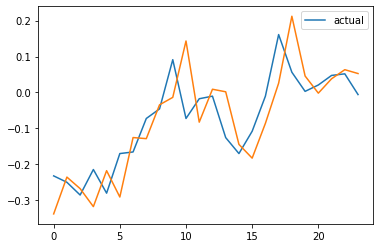

In [154]:
predictions = model(testDataX)
plt.plot(testDataY[:24].asnumpy(), label = 'actual')
plt.plot(predictions[:24].asnumpy())
plt.legend()
plt.savefig('univariateGRU_nonprediction.png')

In [150]:
testDataX2 = testDataX.copy()
y_pred2 = []

for i in range(len(testDataX2)):
    data = testDataX2[i]
    shape = data.shape
    shape = (1, ) + shape
    y = model(data.reshape(*shape))
    y_pred2.append(y.reshape(1).asscalar())
    for j in range(1, np.min([hrs, len(testDataX2) - i - 1]) + 1):
        testDataX2[i + j][-j][0] = y.reshape(1)

y_pred2 = np.array(y_pred2)

In [155]:
#plt.plot(testDataY[0:24].asnumpy(), label = 'actual')
#plt.plot(y_pred2[0:24])
#plt.legend()